In [ ]:
!git clone https://github.com/JananiJayakumar23/Car-Assignment.git

fatal: destination path 'Car-Assignment' already exists and is not an empty directory.


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as c
from matplotlib import gridspec as grid
from sklearn.metrics import RocCurveDisplay


In [ ]:
df1=pd.read_csv('/content/Car-Assignment/Car_Assignment1.csv')
df2=pd.read_csv('/content/Car-Assignment/Car_Assignment 2 .csv')
df3=pd.read_csv('/content/Car-Assignment/Car_Assignment 3.csv')

In [ ]:
#print the first five entries of the dataset
df1.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Successful_Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,NaN,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [ ]:
#print the rows and columns of dataset1
df1.shape

(205, 27)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         200 non-null    float64
 10  carlength         200 non-null    float64
 11  carwidth          200 non-null    float64
 12  carheight         200 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#check the dtype of dataset 1
df1.dtypes

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [ ]:
#print the value count of all columns in dataset1
for i in df1:
    print(i,':\n',len(df1[i].value_counts()),'modalities')

car_ID :
 205 modalities
symboling :
 6 modalities
CarName :
 147 modalities
fueltype :
 2 modalities
aspiration :
 2 modalities
doornumber :
 2 modalities
carbody :
 5 modalities
drivewheel :
 3 modalities
enginelocation :
 2 modalities
wheelbase :
 51 modalities
carlength :
 74 modalities
carwidth :
 43 modalities
carheight :
 49 modalities
curbweight :
 171 modalities
enginetype :
 7 modalities
cylindernumber :
 7 modalities
enginesize :
 44 modalities
fuelsystem :
 8 modalities
boreratio :
 38 modalities
stroke :
 37 modalities
compressionratio :
 32 modalities
horsepower :
 59 modalities
peakrpm :
 23 modalities
citympg :
 29 modalities
highwaympg :
 30 modalities
price :
 189 modalities
Successful_Model :
 2 modalities


In [ ]:
#count the number of missing values in dataset1
df1.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,5


In [ ]:
df1.isna().values.any()

np.True_

In [ ]:
# drop the missing values
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,200.0,104.790000,58.842229,1.00,54.750,105.50,155.25,205.00
symboling,200.0,0.820000,1.251170,-2.00,0.000,1.00,2.00,3.00
wheelbase,200.0,98.792500,6.011605,86.60,94.500,96.95,102.40,120.90
carlength,200.0,174.079000,12.239776,141.10,166.300,173.20,183.20,208.10
carwidth,200.0,65.888500,2.130685,60.30,64.075,65.50,66.90,72.30
carheight,200.0,53.729500,2.452254,47.80,52.000,54.10,55.50,59.80
curbweight,200.0,2555.675000,523.247407,1488.00,2145.000,2412.00,2939.25,4066.00
enginesize,200.0,127.055000,42.074616,61.00,97.000,115.50,145.25,326.00
boreratio,200.0,3.332450,0.272106,2.54,3.150,3.31,3.59,3.94
stroke,200.0,3.252650,0.316831,2.07,3.110,3.28,3.41,4.17


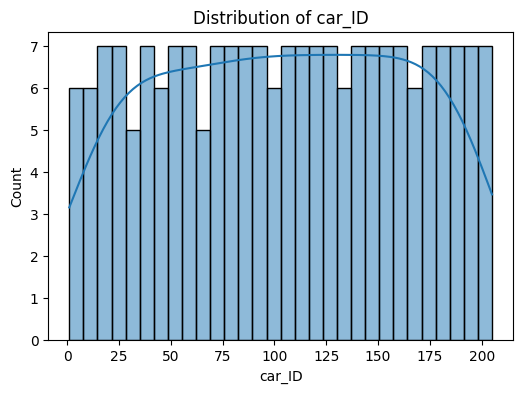

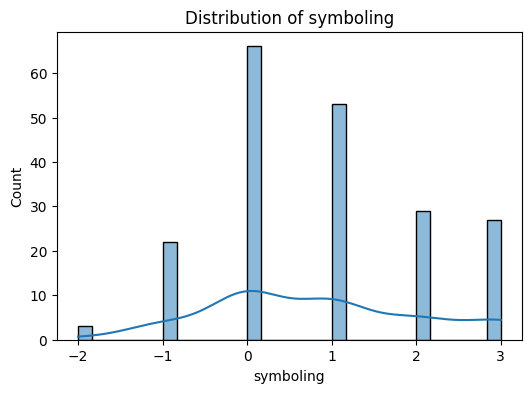

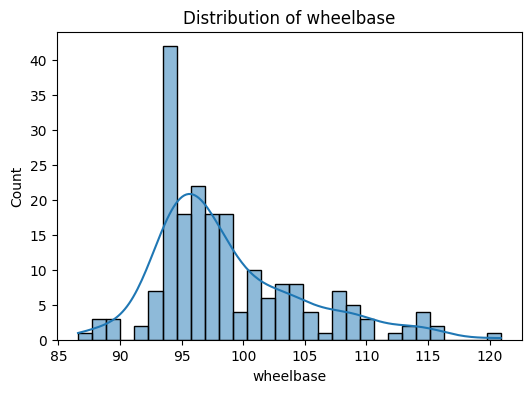

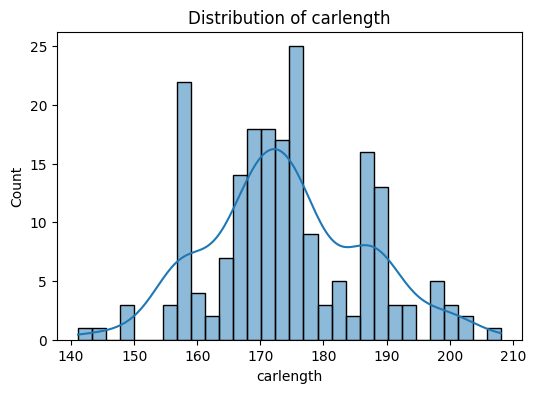

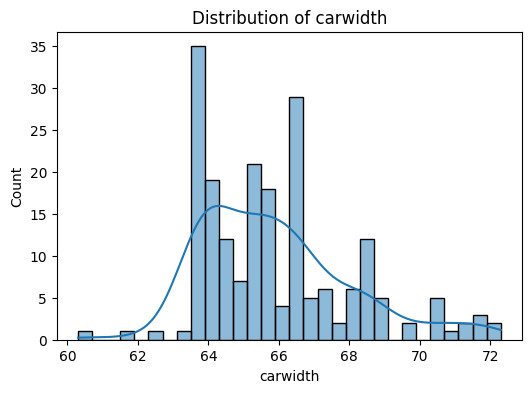

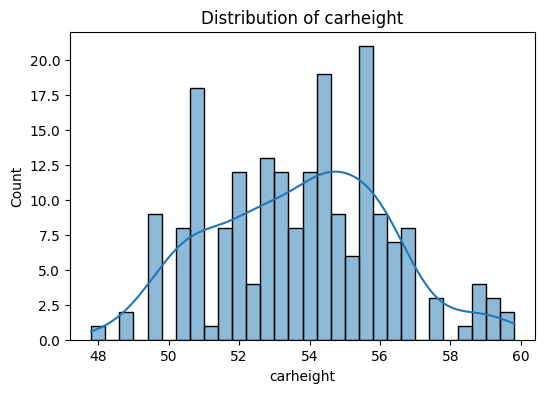

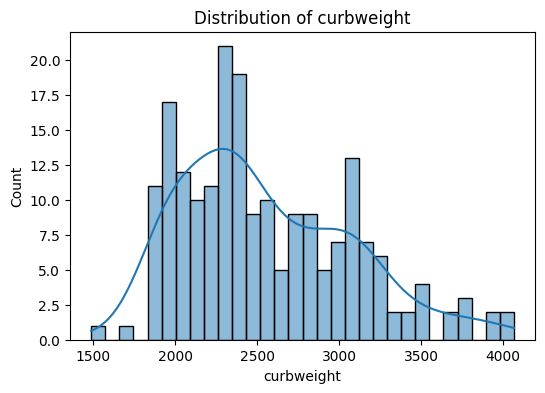

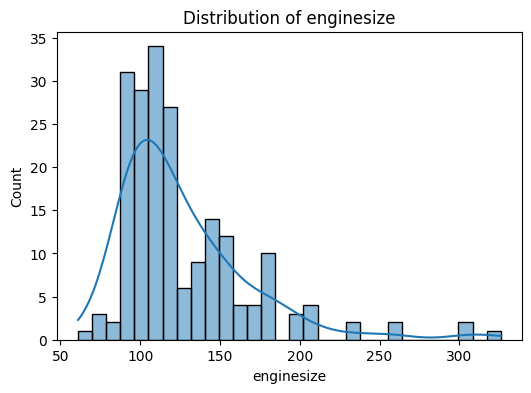

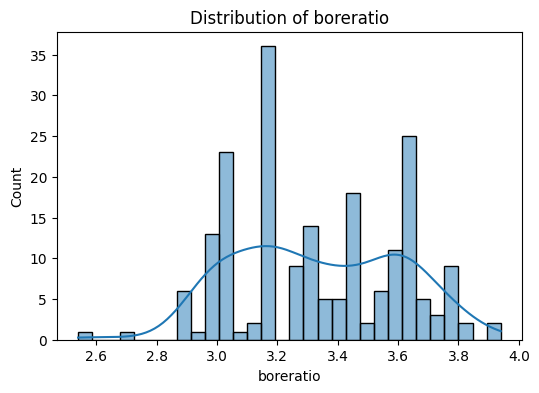

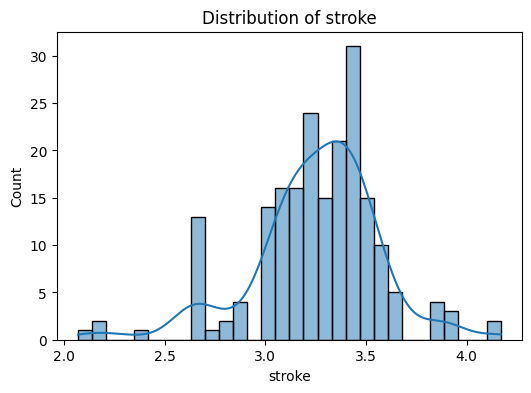

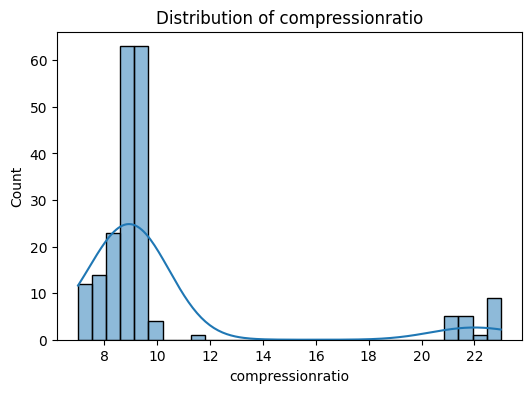

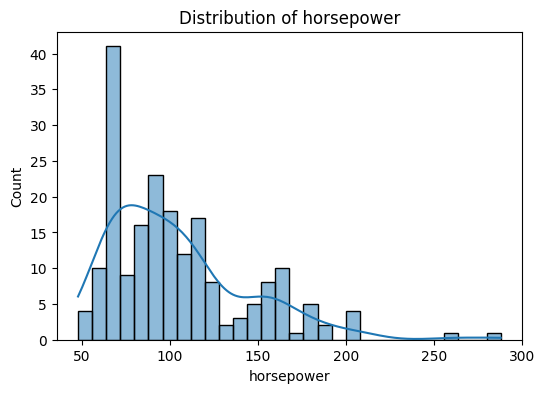

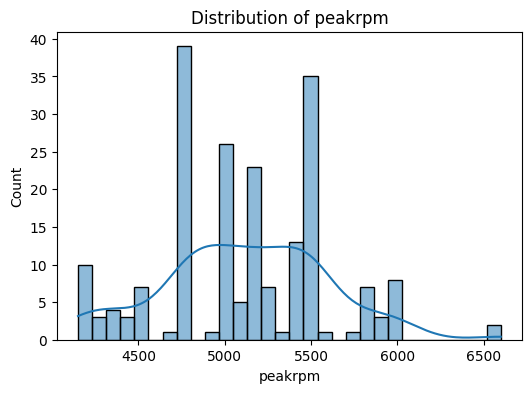

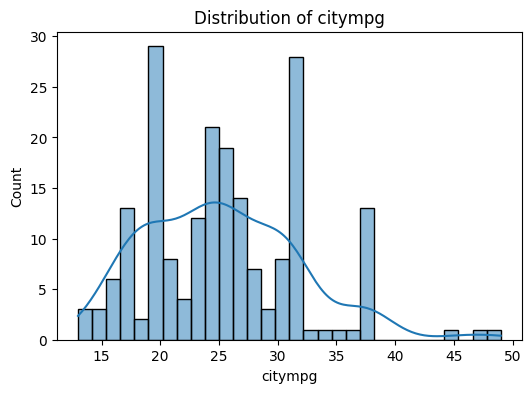

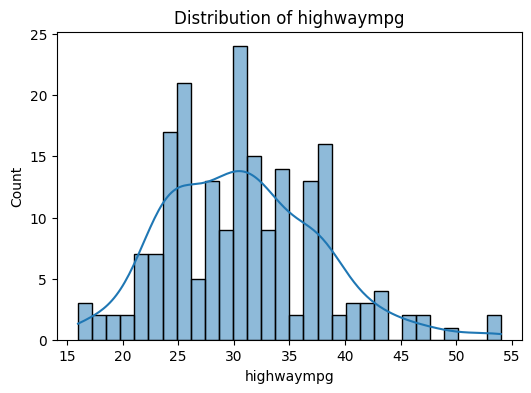

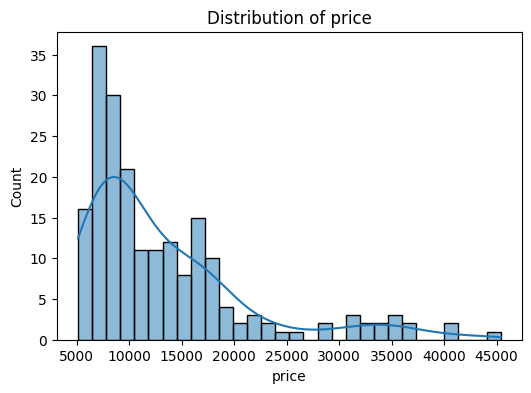

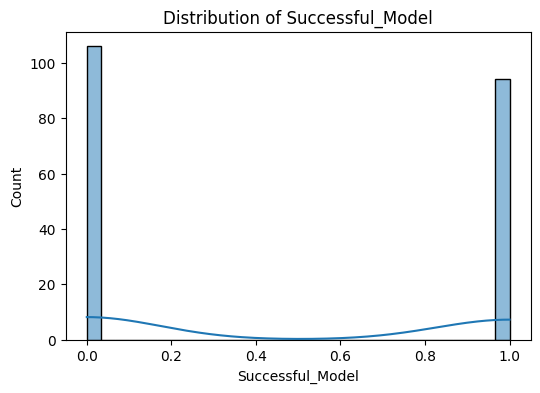

In [ ]:
# Distribution of numerical features
num_cols = df1.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

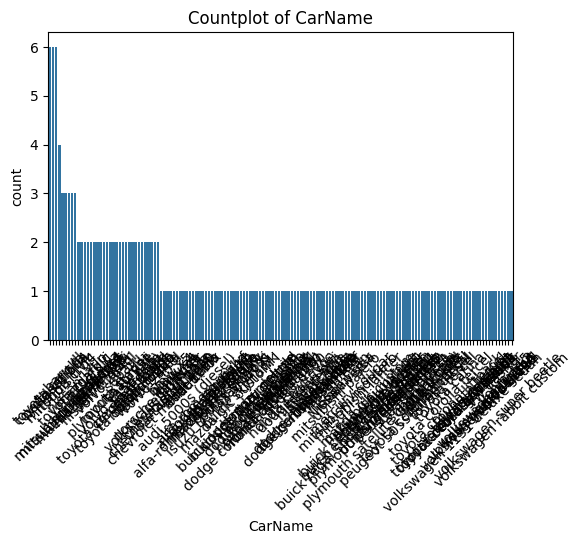

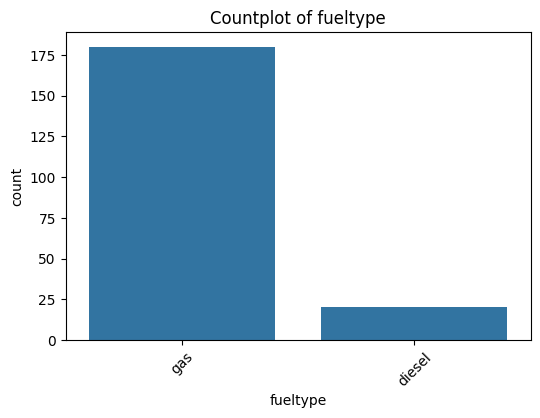

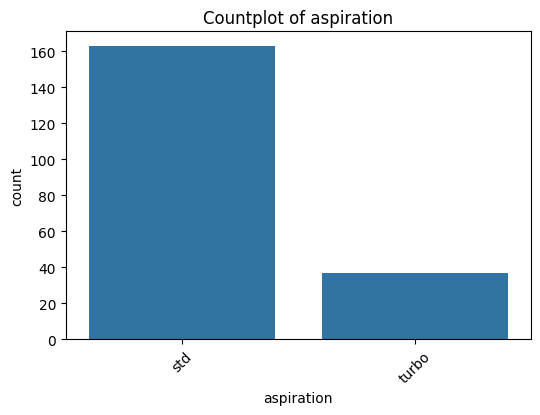

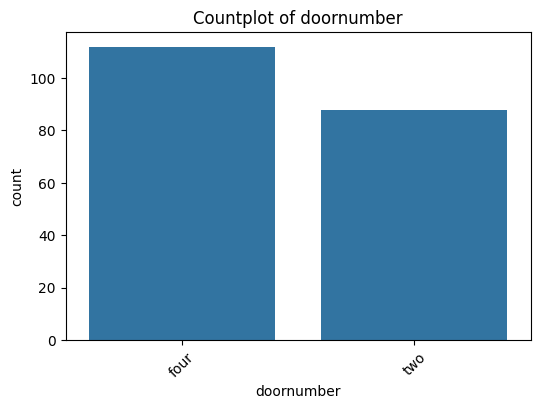

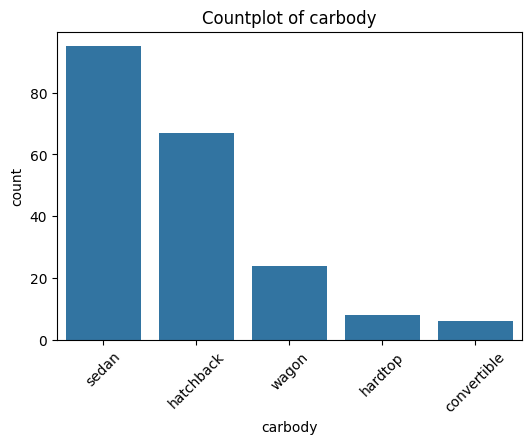

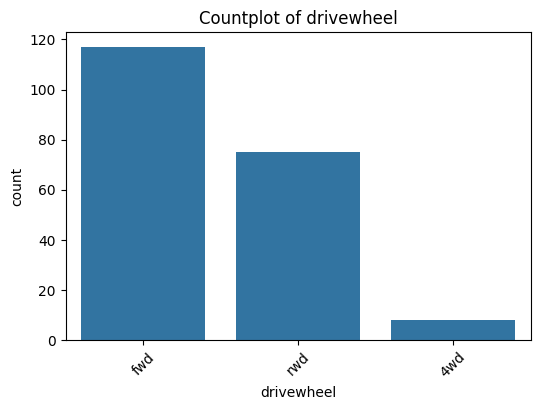

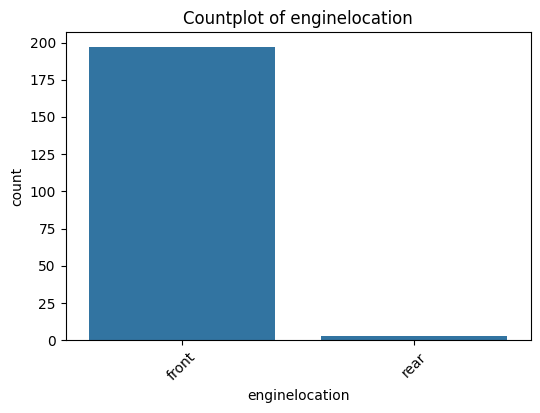

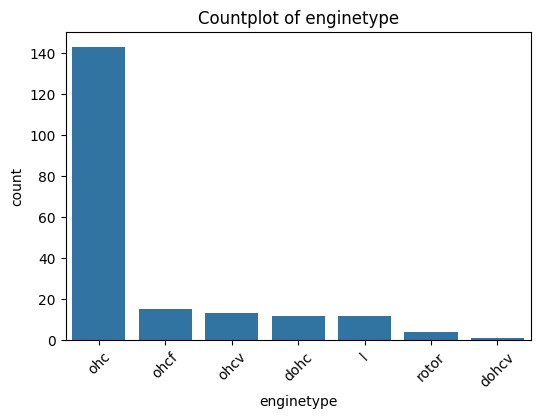

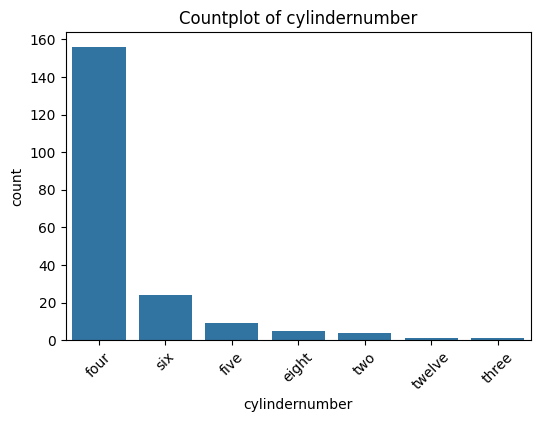

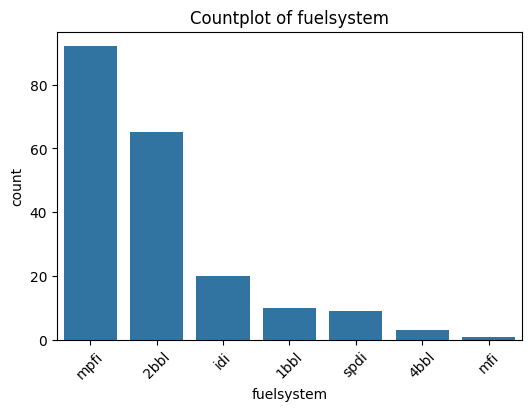

In [ ]:
# Countplots for categorical features
cat_cols = df1.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df1, x=col, order=df1[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    plt.show()

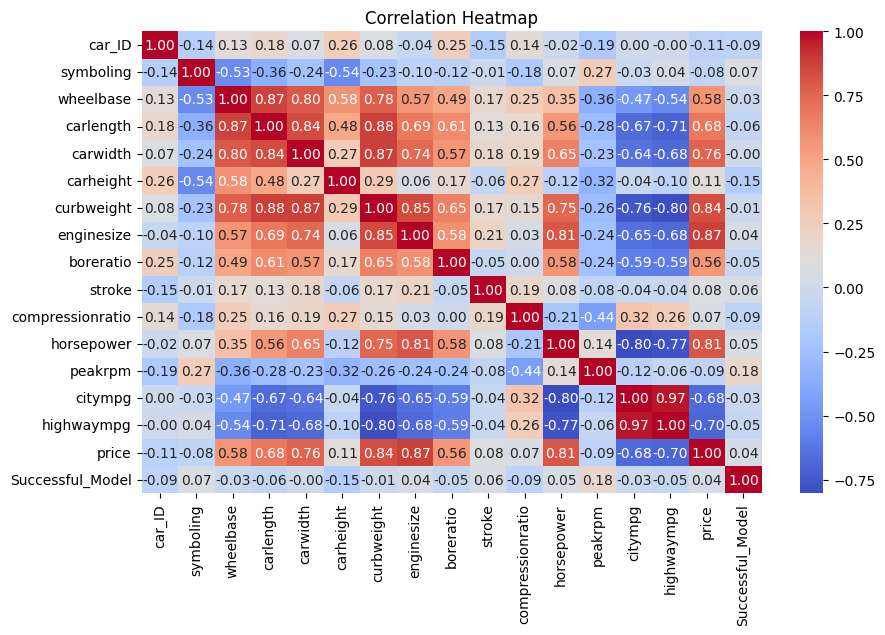

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df1[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score, silhouette_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df_encoded = pd.get_dummies(df1, drop_first=True)

In [ ]:
#Predict price (Regression)
X = df_encoded.drop(columns=['price', 'Successful_Model'])
y = df_encoded['price']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Question 1 Price Prediction
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
print("Price Prediction")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Price Prediction
RMSE: 241231.83282992052
R²: -578.7238931502145


In [ ]:
#Question 2
#Binary Classification (Successful Model)
X_cls = df_encoded.drop(columns=['Successful_Model'])
y_cls = df_encoded['Successful_Model']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)
y_pred_lr = log_reg.predict(X_test_c)

print("Logistic Regression")
print(classification_report(y_test_c, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test_c, log_reg.predict_proba(X_test_c)[:,1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        30
           1       0.46      0.37      0.41        30

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.46        60
weighted avg       0.47      0.47      0.46        60

ROC-AUC: 0.44333333333333336


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_c, y_train_c)
y_pred_rf = rf.predict(X_test_c)

print(" Random Forest")
print(classification_report(y_test_c, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test_c, rf.predict_proba(X_test_c)[:,1]))

 Random Forest
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        30
           1       0.41      0.37      0.39        30

    accuracy                           0.42        60
   macro avg       0.42      0.42      0.42        60
weighted avg       0.42      0.42      0.42        60

ROC-AUC: 0.4527777777777777


In [ ]:
# SVM
svm = SVC(probability=True)
svm.fit(X_train_c, y_train_c)
y_pred_svm = svm.predict(X_test_c)

print("SVM")
print(classification_report(y_test_c, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test_c, svm.predict_proba(X_test_c)[:,1]))

SVM
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60

ROC-AUC: 0.5377777777777777


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Q3: Clustering
features = ['horsepower', 'price', 'citympg', 'highwaympg']
X_cluster = df1[features].copy()

In [ ]:
# Scale
X_scaled = StandardScaler().fit_transform(X_cluster)

# Find optimal k using Silhouette Score
sil_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append((k, sil))

In [ ]:
# Choose best k
best_k = max(sil_scores, key=lambda x: x[1])[0]
print(" Clustering")
print("Best k by silhouette score:", best_k)

 Clustering
Best k by silhouette score: 2


In [ ]:
# Final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df1['Cluster'] = clusters

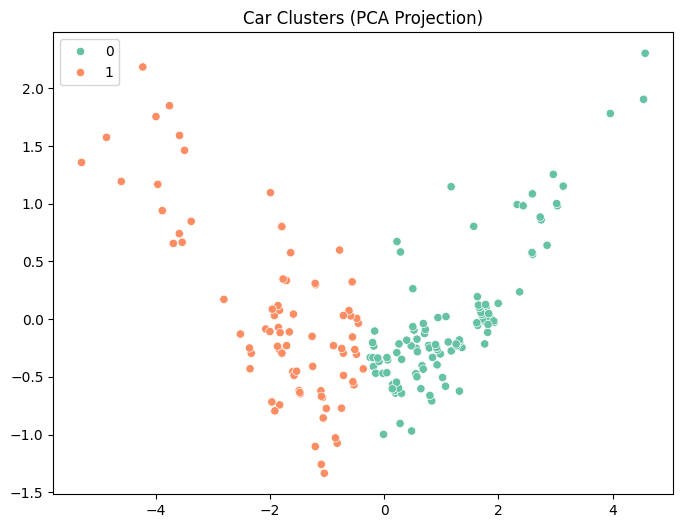

In [ ]:
# Cluster visualization (PCA 2D)
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_coords[:,0], y=pca_coords[:,1], hue=clusters, palette="Set2")
plt.title("Car Clusters (PCA Projection)")
plt.show()

In [ ]:
# Cluster Summary
print(df1.groupby('Cluster')[['horsepower','price','citympg','highwaympg']].mean())

         horsepower         price    citympg  highwaympg
Cluster                                                 
0         80.333333   8548.325000  29.308333   35.083333
1        140.362500  20380.108337  19.187500   24.350000


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [ ]:
# Questin 4
# Load Car_Assignment2
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.groupby('Date')['Sales'].sum().reset_index()

In [ ]:
# Resample weekly sales
df2 = df2.set_index('Date').resample('W').sum().reset_index()

In [ ]:
# Train-test split (last 12 weeks for validation)
train = df2[:-12]
test = df2[:-12]

In [ ]:
#Model 1: SARIMA
sarima_model = SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test))
# match test size

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Model 2: Prophet
prophet_df = train.rename(columns={'Date':'ds','Sales':'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=len(test), freq='W')
prophet_forecast = prophet_model.predict(future).tail(len(test))['yhat']

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu__lyfd9/6w_rvoai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu__lyfd9/9xzr793l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6359', 'data', 'file=/tmp/tmpu__lyfd9/6w_rvoai.json', 'init=/tmp/tmpu__lyfd9/9xzr793l.json', 'output', 'file=/tmp/tmpu__lyfd9/prophet_model4641oyjl/prophet_model-20250924151908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:19:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:08 - cmdstanpy - INFO - Chain

In [ ]:
# --- Evaluate ---
sarima_rmse = np.sqrt(mean_squared_error(test['Sales'], sarima_forecast))
prophet_rmse = np.sqrt(mean_squared_error(test['Sales'], prophet_forecast))

print("Forecast Evaluation")
print("SARIMA RMSE:", sarima_rmse)
print("Prophet RMSE:", prophet_rmse)

Forecast Evaluation
SARIMA RMSE: 90.59855592633323
Prophet RMSE: 164.2848630387525


In [ ]:
#Q5: Relationship between Price, Ad Spend, and Sales (Car_Assignment3)
import statsmodels.api as sm

In [ ]:
# Correlation check
print("Correlation Matrix")
print(df3[['Sales','Price','Ad Spend']].corr())

# Multiple Regression
X = df3[['Price','Ad Spend']]
y = df3['Sales']

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

Correlation Matrix
             Sales     Price  Ad Spend
Sales     1.000000 -0.018686  0.057104
Price    -0.018686  1.000000  0.059285
Ad Spend  0.057104  0.059285  1.000000
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4517
Date:                Wed, 24 Sep 2025   Prob (F-statistic):              0.637
Time:                        15:19:09   Log-Likelihood:                -770.35
No. Observations:                 243   AIC:                             1547.
Df Residuals:                     240   BIC:                             1557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err   